**Number of Polling Locations by Neighborhood**

*By Jackson Lustina*

I chose to do polling locations because of the 2020 Presidential Election. It would be very important for voters to know polling locations during an election. 

In [2]:
# Import pandas for geojson manipulation
# Import geopandas in order to use geojson and geometry objects
# Import matplotlib to graph map
# Import warnings cause an annoying warning was popping up 
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [5]:
# Retrieve Files
neighborhood = gpd.read_file("../Neighborhoods_.geojson")
polling = gpd.read_file("Polling.geojson")

In [6]:
# See where polls are located
pollNum = pd.DataFrame(neighborhood.objectid, columns=['objectid', 'polling'])
for index, n in neighborhood.iterrows():
    numOfPolls = 0 
    for index, p in polling.iterrows():
        # Check each neighborhood and polling location for intersection
        if n.geometry.intersects(p.geometry):
            numOfPolls += 1
    # If polls exist add num to new col in pollNum data frame
    pollNum.at[pollNum[pollNum['objectid'] == n.objectid].index.values[0], 'polling'] = numOfPolls

# Place polls col into the neighborhood geojson to be used in map
neighborhood.insert(1, 'polling', pollNum.polling)

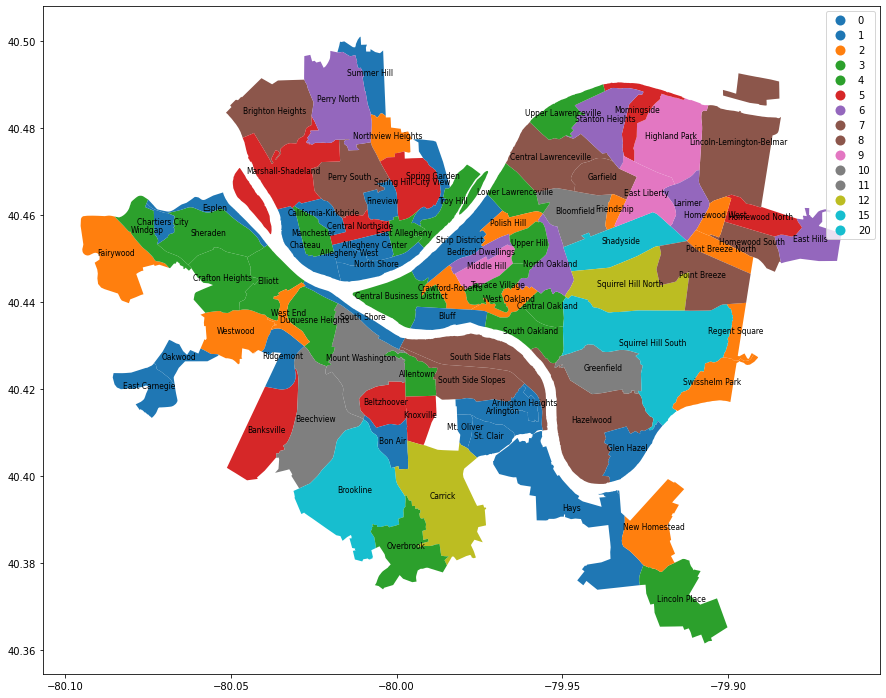

In [7]:
# Create the plot and set its size
fig, ax = plt.subplots(figsize=(15, 15))

# Find the center of each neighborhood
neighborhood['center']= neighborhood.geometry.centroid

# Copy neighborhood so it doesn't confict when ploting
neighborhoodPts = neighborhood.copy()
# Make a new geometry for center of shape
neighborhoodPts.set_geometry("center", inplace = True)

# For each row set a name at a point
for x, y, label in zip(neighborhoodPts.geometry.x, neighborhoodPts.geometry.y, neighborhood.hood):
    plt.text(x, y, label, fontsize = 7.5, ha = 'center', weight = '525')
    
# Plot the map on ax with colors based off the number of polling locations
neighborhood.plot(column='polling', ax=ax, legend=True)

**Shadyside**, **Squirrel Hill South**, and **Brookline** are the areas with the most polling locations. These neighborhoods have somewhere between 15 and 20 polling locations. 